In [1]:
from lcapy import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

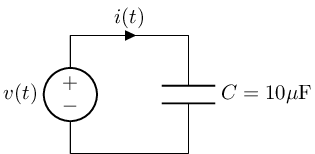

In [2]:
cct1 = Circuit("""
    Vs  1  0 {rampstep((t-0.005)*100) - rampstep((t-0.02)*50)}; down, l=$v(t)$
    W0  1 _1; right, i>^=$i(t)$
    C  _1 _0 10e-6; down, l^={$C=10 \mu \mathrm{F}$}
    W1 _0  0; left
    ; draw_nodes=false, label_nodes=false
    """)
cct1.draw()

In [3]:
voltage = cct1[1].v
current = cct1.C.i
power   = voltage * current
energy  = cct1.C.C * (voltage ** 2) / 2

vt = np.linspace(0, 0.05, 200)

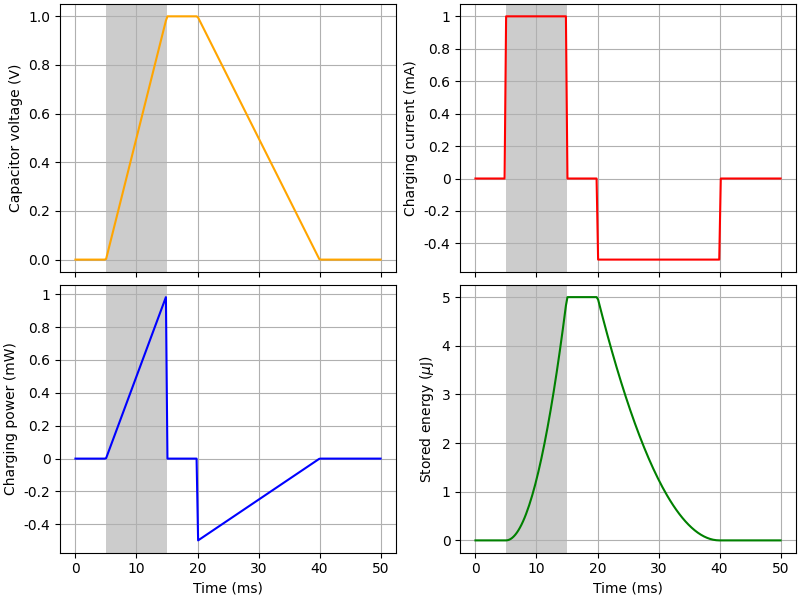

In [11]:
%matplotlib widget

vt = np.linspace(0, 0.05, 200)
ticks_milli = mpl.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x * 1000))
ticks_micro = mpl.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x * 1e6))

fig, axs = plt.subplots(2, 2, figsize=(8, 6), constrained_layout=True, sharex=True, label="Capacitor stored energy")

for a in axs.flatten():
    a.xaxis.set_major_formatter(ticks_milli)
    a.axvspan(5e-3, 15e-3, facecolor = '0.8')
    
axs[0, 1].yaxis.set_major_formatter(ticks_milli)
axs[1, 0].yaxis.set_major_formatter(ticks_milli)
axs[1, 1].yaxis.set_major_formatter(ticks_micro)

voltage.plot(vt, axes=axs[0, 0], color='orange', xlabel='',          ylabel='Capacitor voltage (V)')
current.plot(vt, axes=axs[0, 1], color='red',    xlabel='',          ylabel='Charging current (mA)')
power  .plot(vt, axes=axs[1, 0], color='blue',   xlabel='Time (ms)', ylabel='Charging power (mW)')
energy .plot(vt, axes=axs[1, 1], color='green',  xlabel='Time (ms)', ylabel='Stored energy ($\mu$J)')

display()